In [88]:
import cv2
import requests
import numpy as np
from matplotlib import pyplot as plt
import subprocess
import random
import os

In [89]:
pieces = [
    "b",
    "k",
    # "n",
    # "p",
    # "q",
    # "r",
]
colors = ["b", "w"]

In [90]:
chesscom_themes = [
    "neo",
    "game_room",
    # "wood",
    # "glass",
    # "gothic",
    # "classic",
    # "metal",
    # "bases",
    # "neo_wood",
    # "icy_sea",
    # "club",
    # "ocean",
    # "newspaper",
    # "space",
    # "cases",
    # "condal",
    # "8_bit",
    # "marble",
    # "book",
    # "alpha",
    # "bubblegum",
    # "dash",
    # "graffiti",
    # "light",
    # "lolz",
    # "luca",
    # "maya",
    # "modern",
    # "nature",
    # "neon",
    # "sky",
    # "tigers",
    # "tournament",
    # "vintage",
]

def get_cheesscom_imgs(piece, color, size=150):
    imgs = []
    for theme in chesscom_themes:
        url = f"https://images.chesscomfiles.com/chess-themes/pieces/{theme}/{size}/{color}{piece}.png"
        response = requests.get(url)
        img_array = np.array(bytearray(response.content), dtype=np.uint8)
        imgs.append(cv2.imdecode(img_array, -1))
    return imgs

In [91]:
def svg_to_img(url, size):
    response = requests.get(url)
    with open("temp.svg", "wb") as f:
        f.write(response.content)
    subprocess.run(f"rsvg-convert -h {size} temp.svg > temp.png", shell=True)
    return cv2.imread("temp.png", cv2.IMREAD_UNCHANGED)

In [ ]:
lichess_themes=[
"alpha",
# "anarcandy",
"caliente",
"california",
"cardinal",
"cburnett",
"celtic",
"chess7",
"chessnut",
"companion",
# "disguised",
"dubrovny",
"fantasy",
"fresca",
"gioco",
"governor",
# "horsey",
"icpieces",
"kiwen-suwi",
"kosal",
"leipzig",
# "letter",
"libra",
"maestro",
"merida",
# "mono",
"mpchess",
"pirouetti",
"pixel",
"reillycraig",
"riohacha",
# "shapes",
"spatial",
"staunty",
"tatiana",
]

def get_lichess_imgs(piece, color, size=150):
    imgs = []
    for theme in lichess_themes:
        url = f"https://raw.githubusercontent.com/lichess-org/lila/fe35573d61175775a91813fc3c88244d9bf2a6d6/public/piece/{theme}/{color}{piece.upper()}.svg"
        imgs.append(svg_to_img(url, size))
    return imgs

In [ ]:
respawn_themes = [
    "set1",
    "set2",
    "set3",
]

def get_respawn_imgs(piece, color, size=150):
    imgs = []
    for theme in respawn_themes:
        url = f"https://res-pawn.com/images/pieces/{theme}/{piece}-{color}.svg"
        imgs.append(svg_to_img(url, size))
    return imgs

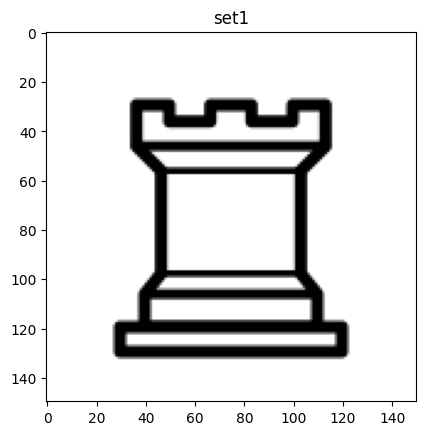

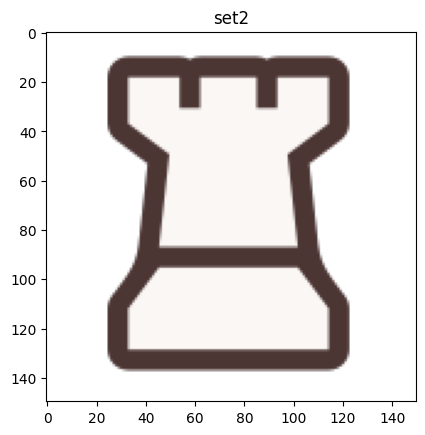

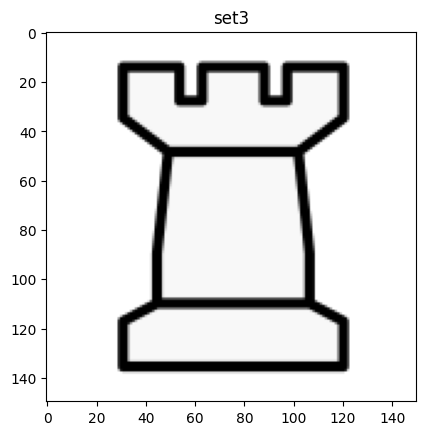

In [92]:
imgs = get_lichess_imgs("r", "w")
for i,img in enumerate(imgs):
    plt.figure()
    plt.title(lichess_themes[i])
    plt.imshow(img)

In [93]:
def gen_alterations(img, save_path, themename):
    trans_mask = img[:,:,3] == 0

    i = 0
    for r in range(2):
        for g in range(2):
            for b in range(2):
                new_img = img.copy()
                new_img[trans_mask] = [r * 128 + random.randint(0, 64), g * 128 + random.randint(0, 64), b * 128 + random.randint(0, 64), 255]
                cv2.imwrite(f"{save_path}/{themename}-{i}.png", new_img)
                i += 1

In [94]:
# for piece in pieces:
#     dir = f"generated/{piece}"
#     if not os.path.exists(dir):
#         os.makedirs(dir)

#     for theme in chesscom_themes:
#         img = get_cheesscom_img(theme, piece)
#         gen_alterations(img, dir, theme)